In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

!pip install tensorflow-addons
import tensorflow_addons as tfa

import itertools

tf.random.set_seed(1)

In [25]:
import pickle

images1 = pickle.load( open('../../../../github_repos/CROHME_extractor/outputs1/train1/train.pickle', 'rb') )
images2 = pickle.load( open('../../../../github_repos/CROHME_extractor/outputs2/train2/train.pickle', 'rb') )
images3 = pickle.load( open('../../../../github_repos/CROHME_extractor/outputs3/train3/train.pickle', 'rb') )

In [26]:
images = images1 + images2 + images3

In [27]:
classes = pd.read_csv('../../../../github_repos/CROHME_extractor/classes.txt', header =None)

In [28]:
classes.to_dict()[0]

{0: '(',
 1: ')',
 2: '+',
 3: '-',
 4: '0',
 5: '1',
 6: '2',
 7: '3',
 8: '4',
 9: '5',
 10: '6',
 11: '7',
 12: '8',
 13: '9',
 14: '=',
 15: 'a',
 16: 'b',
 17: 'c',
 18: 'd',
 19: 'e',
 20: 'i',
 21: 'j',
 22: 'k',
 23: 'n',
 24: 'x',
 25: 'y',
 26: 'z'}

In [29]:
X_train = []
y_train = []
for i in images:
    X_train.append(np.resize(i['features'], (50,50,1)))
    y_train.append(i['label'])

In [30]:
X_train[0].shape

(50, 50, 1)

In [31]:
X_train = tf.image.resize_with_pad(X_train, 175, 175)

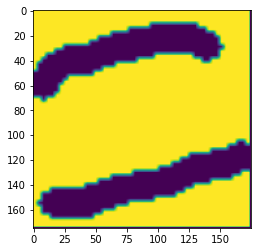

In [32]:
plt.imshow(X_train[0])

In [33]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [34]:
X_train=1-X_train

In [35]:
y_train = np.argmax(y_train, axis=1)

In [36]:
X_train.shape

(27352, 175, 175, 1)

In [37]:
y_train.shape

(27352,)

In [14]:
ranlist[0]

NameError: name 'ranlist' is not defined

In [85]:
y_train[ranlist[0]]

3

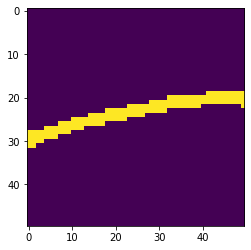

In [98]:
plt.imshow(X_train[ranlist[0]])

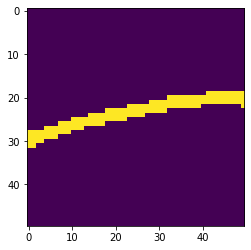

In [99]:
plt.imshow(X_train[ranlist[0]])

In [100]:
#X_train = tfa.image.rotate(X_train, -20*3.14/180, interpolation='BILINEAR')
from random import randint
ranlist = []
for i in range(0,5000):
    ranlist.append(randint(0,y_train.shape[0]-1))
    
for i in range(0,5000):
     X_train[ranlist[i]] = tfa.image.rotate(X_train[ranlist[i]], -10*3.14/180, interpolation='BILINEAR')

In [13]:
X_train.shape[0]

27352

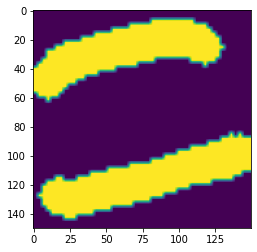

In [17]:
plt.imshow(X_train[9122])

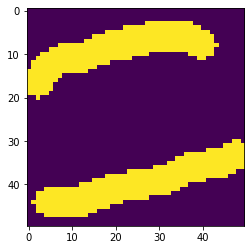

In [103]:
plt.imshow(X_train[0])

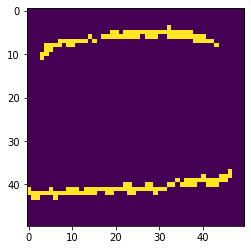

In [104]:
plt.imshow(X_train[18244])

In [18]:
X_train.shape

(27352, 150, 150, 1)

In [38]:
def build_model(conv_layers, pool_layers, epochs, X_train, y_train,k):
    cnn_model = build_cnn(conv_layers, pool_layers,k)
  

    # Define a loss function
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

    # Compile the model
    cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

    history = cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

    plot_history(history, epochs)

    confusionmatrix(model= cnn_model)

    return cnn_model

In [39]:
def build_cnn(conv_layers, pool_layers, k):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(45, kernel_size=k,activation='relu',input_shape=(175,175,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Dropout(0.3))
    x=30
    for i in range(1, conv_layers):
        if i <= conv_layers-1:        
            model_cnn.add(Conv2D(x, kernel_size=k,activation='relu',padding='same'))
            model_cnn.add(MaxPooling2D((2, 2), padding='same'))
            model_cnn.add(Dropout(0.3))
            x=x-15
    model_cnn.add(Flatten())
    model_cnn.add(Dense(256))
    model_cnn.add(Dense(112))
    model_cnn.add(Dense(27, activation='softmax'))

    print(model_cnn.summary())
    return model_cnn

In [40]:
def plot_history(history, epochs):
    epochs = range(epochs)

    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
    plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
    plt.legend()
    plt.grid()

In [41]:
def confusionmatrix(model):

    confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

    confusion_norm = confusion.astype('float') / confusion.sum(axis=0)[:, np.newaxis]

    classes=[0,1,2,3,4,5,6,7,8,9]

    plt.figure(figsize=(14,14))
    plt.imshow(confusion_norm, interpolation='nearest') 
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    fmt = '.3f'
    thresh = confusion_norm.max() / 2.
    for i, j in itertools.product(range(confusion_norm.shape[0]), range(confusion_norm.shape[1])):
        plt.text(j, i, format(confusion_norm[i, j], fmt), horizontalalignment="center",
        color="black" if confusion_norm[i, j] > thresh else "white")
    plt.tight_layout()

In [20]:
def data_aug():
    data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),])
    return data_augmentation

With Data Aug

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 45)        1170      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 45)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 45)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 30)        33780     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 15)        1

NameError: name 'y_test' is not defined

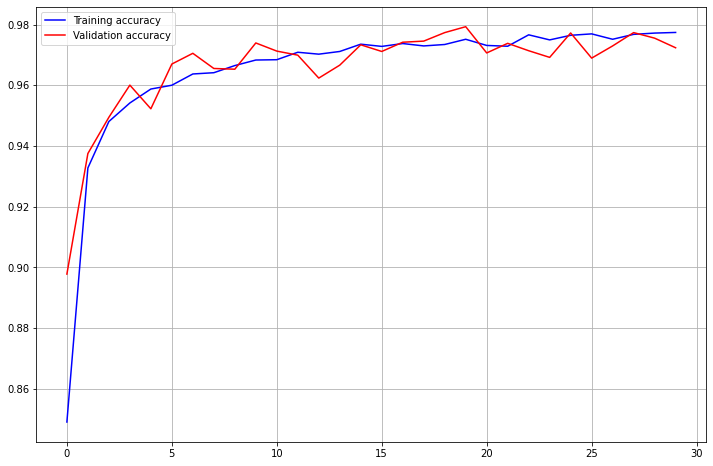

In [26]:
build_model(conv_layers=3, pool_layers=3, epochs=30, X_train=X_train, y_train=y_train, k=5)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 50, 45)        1170      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 45)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 25, 25, 45)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 30)        33780     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 15)      

NameError: name 'y_test' is not defined

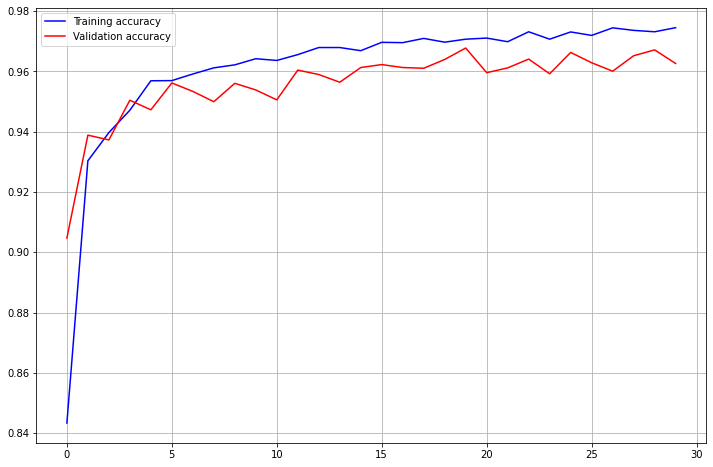

In [115]:
build_model(conv_layers=3, pool_layers=3, epochs=30, X_train=X_train, y_train=y_train, k=5)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 50, 50, 45)        1170      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 45)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 25, 25, 45)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 30)        33780     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 15)      

NameError: name 'y_test' is not defined

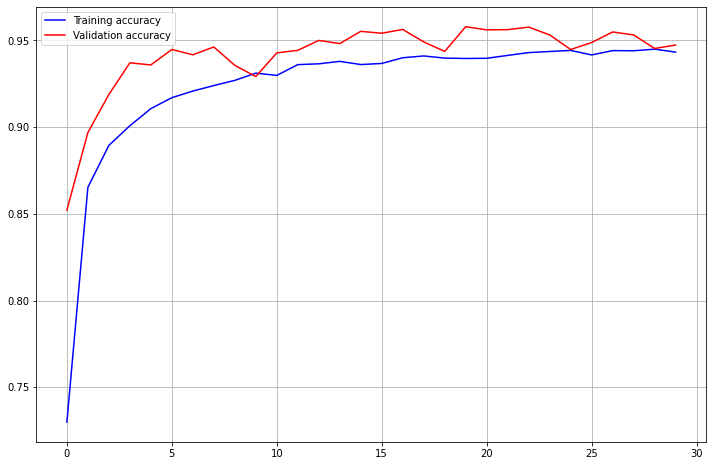

In [116]:
build_model(conv_layers=4, pool_layers=4, epochs=30, X_train=X_train, y_train=y_train, k=5)

Without Data Aug

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 45)        1170      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 45)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 45)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 30)        33780     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 15)       

NameError: name 'y_test' is not defined

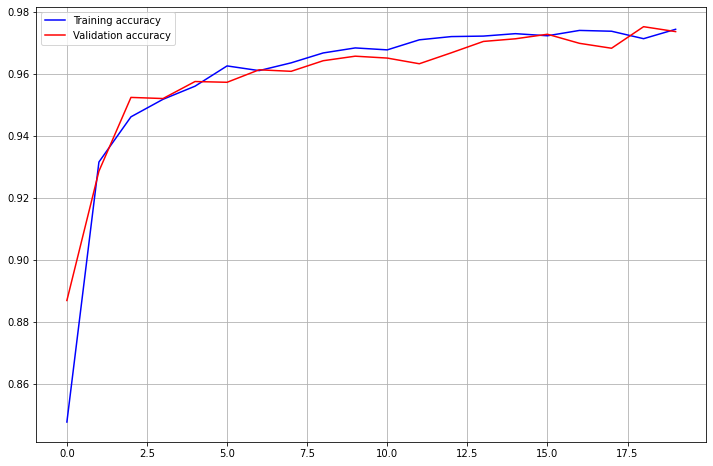

In [25]:
model = build_model(conv_layers=3, pool_layers=3, epochs=20, X_train=X_train, y_train=y_train, k=5)

In [44]:
cnn_model = build_cnn(3, 3, 3)
  

    # Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

    # Compile the model
cnn_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=15, validation_split=0.3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 175, 175, 45)      450       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 88, 88, 45)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 88, 88, 45)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 88, 88, 30)        12180     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 44, 44, 30)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 44, 44, 30)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 15)       

KeyboardInterrupt: 

In [43]:
cnn_model.save('saved_model/my_model2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model2/assets


In [44]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 125, 125, 45)      1170      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 45)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 45)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 30)        33780     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 30)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 15)       